<a href="https://colab.research.google.com/github/mahdiislam79/Image_segmentation_practice/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Single Image reconstruction using autoencoders

In [53]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [54]:
SIZE=256


In [55]:
img=cv2.imread('/content/drive/MyDrive/PXL_20221026_195936646.jpg')
img=cv2.resize(img,(SIZE,SIZE))
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Changing BGR to RGB to show true color
print(img.shape)

(256, 256, 3)


In [56]:
img_array = np.expand_dims(img, axis=0)
print(img_array.shape)

(1, 256, 256, 3)


In [57]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 256)     

In [58]:
img_array = img_array.astype('float32') / 255.

In [63]:
model.fit(img_array,img_array, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.0255 - accuracy: 0.4452
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 0.0241 - accuracy: 0.4475
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 0.0240 - accuracy: 0.4545
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 0.0232 - accuracy: 0.4771
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 0.0229 - accuracy: 0.5422
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 0.0229 - accuracy: 0.5396
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 0.0218 - accuracy: 0.5692
Epoch 8/200
1/1 [==============================] - 2s 2s/step - loss: 0.0217 - accuracy: 0.5872
Epoch 9/200
1/1 [==============================] - 1s 1s/step - loss: 0.0218 - accuracy: 0.5660
Epoch 10/200
1/1 [==============================] - 1s 1s/step - loss: 0.0206 - accuracy: 0.5760
Epoch 11/200
1/1 [=====================

In [64]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 268ms/step


In [65]:
pred.shape
pred

array([[[[0.30908513, 0.27595735, 0.3162565 ],
         [0.26893052, 0.23323107, 0.27001768],
         [0.27482706, 0.24130055, 0.28027907],
         ...,
         [0.3529513 , 0.29479423, 0.33946928],
         [0.30759272, 0.2615705 , 0.30189905],
         [0.271239  , 0.26334527, 0.29330635]],

        [[0.21336938, 0.19414648, 0.20800903],
         [0.20792237, 0.16464514, 0.16776286],
         [0.2272997 , 0.19501832, 0.17976032],
         ...,
         [0.30751964, 0.2814203 , 0.25704056],
         [0.2389856 , 0.21371381, 0.20348595],
         [0.20736784, 0.20196009, 0.21333495]],

        [[0.19804996, 0.18690939, 0.1996626 ],
         [0.19393617, 0.1720793 , 0.17735218],
         [0.22170076, 0.21734543, 0.21056405],
         ...,
         [0.32728085, 0.31333777, 0.2956254 ],
         [0.24713159, 0.22891368, 0.21687114],
         [0.19565904, 0.19358146, 0.205936  ]],

        ...,

        [[0.468153  , 0.46401444, 0.46151903],
         [0.50977176, 0.47100297, 0.4877    ]

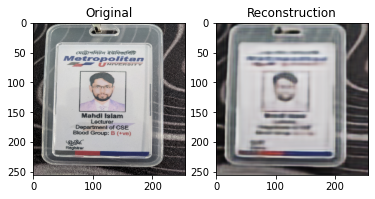

In [66]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.title('Reconstruction')
plt.show()